# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Instructor: Davis Buenger
- Section: Tuesday/Thursday 5:30 pm
- Student Name: Xuecheng Liu
- Student Email: liu.6765@osu.edu
- Student ID: 500244459

Template Version V1.
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# display the head of dataset
df = pd.read_excel(open('HW2.xlsx','rb'), 1)
df=df.rename(columns={'Unnamed: 0': 'RECID', 'Unnamed: 1': 'TRAIN', 'Unnamed: 2':'CLASS'})
df.head()

,RECID,TRAIN,CLASS,GENERAL HEALTH CONDITION,SPOUSE LIVING IN SAME HOUSEHOLD,EDUCATIONAL ATTAINMENT,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),"LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME",# OF ROOMS IN HOME,OWN OR RENT HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),CITIZENSHIP STATUS (3 LVLS),COUNTRY BORN IN,WORKING STATUS,FAMILY TYPE (4 LVLS),HEIGHT - INCHES (PUF RECODE),MARITAL STATUS,RACE-CENSUS 2000 DEFINITION,MAIN OCCUPATION - 2003 RECODE,AGE (PUF RECODE),GENDER,SELF-REPORTED HOUSE TENURE,NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,WGHT - POUNDS (PUF RECODE),ANY WALKING FOR TRANSPORT OR FUN/EXERCISE,EMPLOYMENT STATUS,YEARS LIVED IN THE US
0,NaN,NaN,NaN,AB1,AH44,AHEDUC,AK22_P,AK23,AK24,AK25,AK26_P,AK27_P,CITIZEN2,CNTRYS,EMP,FAMT4,HGHTI_P,MARIT,RACECEN,OCCMAIN,SRAGE_P,SRSEX,SRTENR,TIMEAD,WGHTP_P,WLKANY,WRKST,YRUS
1,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,Monthly Rent,Monthly Mortgage,Citizenship,Country of Birth,Working Status,Family Type,Height,Marital Status,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status,Years in USA
2,1,y,c,1,1,4,50000,1,6,1,-1,600,1,1,4,3,65,1,5,-1,35,2,1,48,220,1,5,-1
3,2,y,d,2,-1,4,13200,3,3,2,170,-1,1,1,4,1,64,2,5,-1,81,2,2,60,140,1,5,-1
4,3,y,n,2,1,3,12000,1,3,2,350,-1,1,1,4,3,67,1,2,-1,22,2,2,36,120,2,5,-1


***
# Section: 1 - Evaluation mMethod
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
I will build a confusion matrix with four attributes (dog, cat, both or neither) and then evaluate the F-measures of it. The evaluation will based on F-measures result. I choose to do so because the F-measures provide us with the accuracy of prediction.
***

***
## Section: 1.2 - Define measures that do include the cost information
Include cost information: I will calculate cost according to number of calls (defined above), and then calculate income by the number of appropriate call/classification made (Prospects who are correctly classified will buy the appropriate feeding system 15% of the time). Then I can evalaute the classification according to profit.
***

***
# Section: 2 - Pre-Processing of the Dataset
- Use the Adult dataset.  Split it into a Training dataset and a Test dataset based on the Train attribute (see the README worksheet in the data file).  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing.
***

In [9]:
temp=df.iloc[:,1]
final_temp = temp.drop([0,1]).to_frame()
final_temp.index = range(42044) # reindex

# split the final_temp
train=final_temp[final_temp['TRAIN']=='y']
test=final_temp[final_temp['TRAIN']=='n']
display(train.shape)

# split the df to get train and test set
train_set=df.iloc[0:28031,:] # add 2 to train.shape[0] to include the heading
display(train_set)

test_temp_1=df.iloc[0:2]
test_temp_2=df.iloc[28031:,:]
test_set=pd.concat([test_temp_1,test_temp_2])
test_set.index=range(14017) # reindex
display(test_set)

(28029, 1)

,RECID,TRAIN,CLASS,GENERAL HEALTH CONDITION,SPOUSE LIVING IN SAME HOUSEHOLD,EDUCATIONAL ATTAINMENT,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),"LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME",# OF ROOMS IN HOME,OWN OR RENT HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),CITIZENSHIP STATUS (3 LVLS),COUNTRY BORN IN,WORKING STATUS,FAMILY TYPE (4 LVLS),HEIGHT - INCHES (PUF RECODE),MARITAL STATUS,RACE-CENSUS 2000 DEFINITION,MAIN OCCUPATION - 2003 RECODE,AGE (PUF RECODE),GENDER,SELF-REPORTED HOUSE TENURE,NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,WGHT - POUNDS (PUF RECODE),ANY WALKING FOR TRANSPORT OR FUN/EXERCISE,EMPLOYMENT STATUS,YEARS LIVED IN THE US
0,NaN,NaN,NaN,AB1,AH44,AHEDUC,AK22_P,AK23,AK24,AK25,AK26_P,AK27_P,CITIZEN2,CNTRYS,EMP,FAMT4,HGHTI_P,MARIT,RACECEN,OCCMAIN,SRAGE_P,SRSEX,SRTENR,TIMEAD,WGHTP_P,WLKANY,WRKST,YRUS
1,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,Monthly Rent,Monthly Mortgage,Citizenship,Country of Birth,Working Status,Family Type,Height,Marital Status,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status,Years in USA
2,1,y,c,1,1,4,50000,1,6,1,-1,600,1,1,4,3,65,1,5,-1,35,2,1,48,220,1,5,-1
3,2,y,d,2,-1,4,13200,3,3,2,170,-1,1,1,4,1,64,2,5,-1,81,2,2,60,140,1,5,-1
4,3,y,n,2,1,3,12000,1,3,2,350,-1,1,1,4,3,67,1,2,-1,22,2,2,36,120,2,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28026,28025,y,d,2,1,4,75000,1,4,1,-1,1200,2,3,1,2,65,1,6,2,45,1,1,96,142,1,1,5
28027,28026,y,n,4,-1,5,60000,1,7,1,-1,525,1,1,4,1,70,2,5,-1,59,1,1,384,219,2,5,-1
28028,28027,y,d,3,-1,3,30000,2,5,2,400,-1,1,1,1,1,63,2,5,4,49,2,2,48,160,2,1,-1
28029,28028,y,c,2,-1,2,35000,1,6,1,-1,1145,2,6,4,1,63,2,5,-1,73,2,1,144,128,1,5,5


,RECID,TRAIN,CLASS,GENERAL HEALTH CONDITION,SPOUSE LIVING IN SAME HOUSEHOLD,EDUCATIONAL ATTAINMENT,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),"LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME",# OF ROOMS IN HOME,OWN OR RENT HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),CITIZENSHIP STATUS (3 LVLS),COUNTRY BORN IN,WORKING STATUS,FAMILY TYPE (4 LVLS),HEIGHT - INCHES (PUF RECODE),MARITAL STATUS,RACE-CENSUS 2000 DEFINITION,MAIN OCCUPATION - 2003 RECODE,AGE (PUF RECODE),GENDER,SELF-REPORTED HOUSE TENURE,NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,WGHT - POUNDS (PUF RECODE),ANY WALKING FOR TRANSPORT OR FUN/EXERCISE,EMPLOYMENT STATUS,YEARS LIVED IN THE US
0,NaN,NaN,NaN,AB1,AH44,AHEDUC,AK22_P,AK23,AK24,AK25,AK26_P,AK27_P,CITIZEN2,CNTRYS,EMP,FAMT4,HGHTI_P,MARIT,RACECEN,OCCMAIN,SRAGE_P,SRSEX,SRTENR,TIMEAD,WGHTP_P,WLKANY,WRKST,YRUS
1,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,Monthly Rent,Monthly Mortgage,Citizenship,Country of Birth,Working Status,Family Type,Height,Marital Status,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status,Years in USA
2,28030,n,n,1,1,7,50000,1,4,1,-1,1000,2,5,4,3,62,1,3,-1,35,2,1,60,100,1,5,4
3,28031,n,n,3,1,7,45000,1,5,1,-1,1700,2,2,1,2,63,1,5,2,28,2,1,36,105,1,1,5
4,28032,n,n,4,2,1,0,3,2,2,550,-1,3,2,1,4,59,1,6,10,38,2,2,11,144,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14012,42040,n,d,1,1,7,130000,1,7,1,-1,1800,2,5,1,2,62,1,3,99,40,2,1,120,100,2,1,5
14013,42041,n,n,2,1,3,70000,3,6,1,-1,1200,1,1,1,2,59,1,4,3,47,2,1,192,110,2,1,-1
14014,42042,n,n,3,-1,3,20000,3,1,2,825,-1,1,1,3,4,67,3,4,-1,22,2,2,12,160,2,4,-1
14015,42043,n,d,3,-1,3,27000,1,5,2,1450,-1,1,1,3,1,66,2,4,-1,27,2,2,24,140,1,4,-1


***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the provided Data Dictionary (CHIS 2003 PUF Data Dictionary-Adult May2010.pdf).
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

AB1(Health): GENERAL HEALTH CONDITION. Measured by range from 1 to 5. 1-EXCELLENT, 2-VERY GOOD, 3-GOOD, 4-FAIR, 5-POOR. 
Ordinal. 

AH44(Spouse): SPOUSE LIVING IN SAME HOUSEHOLD. Measured by either 1(true) or -1(false).
Ordinal.

AHEDUC(Education): EDUCATIONAL ATTAINMENT. 1-GRADE 1-8, 2-GRADE 9-11, 3-GRADE 12, 4-SOME COLLEGE, 5-VOCATIONAL SCHOOL, 6-AA OR AS DEGREE, 7-BA OR BS DEGREE, 8-SOME GRAD. SCHOOL, 9-MA OR MS DEGREE, 10-PH.D. OR EQUIVALENT, 91-NO FORMAL EDUCATION.
Ordinal.

AK22_P(Income): HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE). Measured by amount earned greater than or equal to 0(dollars).
Ratio.

AK23(Home Type): LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME. Measured by range from 1 to 3. 
Ordinal.

AK24(Number of Rooms): # OF ROOMS IN HOME. Measured by number greater than or equal to 1.
Ratio.

AK25(Own or Rent Home): OWN OR RENT HOME. Measured by either 1(own), 2(rent), 3(other arrangement).
Ordinal.

AK26_P(Monthly Rent): MONTHLY RENT/SPACE PAYMENT(PUF RECODE). Measured by number greater than or equal to 0, or -1(own).
Ratio.

AK27_P(Monthly Mortgage): MONTHLY MORTGAGE PAYMENT (PUF RECODE). Measured by number greate than or equal to 0, or -1(rent).
Ratio.

CITIZEN2(Citizenship): CITIZENSHIP STATUS(3 LVLS)). 1-US-BORN CITIZEN, 2-NATURALIZED CITIZEN, 3-NON-CITIZEN.
Ordinal.

CNTRYS(Country of Birth): COUNTRY BORN IN. 1-UNITED STATES, 2-MEXICO, 3-CENTRAL AMERICA, 4-OTHER LATIN AMERICA, 5-ASIA & PACIFIC ISLANDS, 6-EUROPE, 7-OTHER.
Ordinal.

EMP(Working Status): WORKING STATUS. -2-PROXY SKIPPED, 1-FULL-TIME EMPLOYED (21+ HOURS/WEEK), 2-PART-TIME EMPLOYED (0-20 HOURS/WEEK), 3-UNEMPLOYED AND LOOKING FOR WORK 1980, 4-NOT WORKING.
Ordinal.

FAMT4(Family Type): FAMILY TYPE. 1-SINGLE NO KIDS, 2-MARRIED NO KIDS,3-MARRIED WITH KIDS, 4- SINGLE WITH KIDS.
Ordinal.

HGHTI_P(Height): HEIGHT-INCHES(PUF RECODE)). Measured by number greate than 0.
Ratio.

MARIT(Martial Status): MARITAL STATUS). 1-MARRIED, 2 OTHERWID/SEP/DIV/LIVING W/PARTNER, 3 NEVER MARRIED. 
Ordinal.

RACECEN(Race): RACE-CENSUS 2000 DEFINITION. 1-PACIFIC ISLANDE, 2-AIA, 3-ASIA, 4-AFRICAN AMERICA, 5-WHIT, 6-OTHER SINGLE RACE, 7-MORE THAN ONE RACE.
Ordinal.

OCCMAIN(Occupation): MAIN OCCUPATION-2003 RECODE. -1-INAPPLICABLE, 1-MANAGEMENT, BUSINESS AND FINALCIA, 2-PROFESSIONAL AND RELATED, 3-SERVIC, 4-SALES AND RELATED, 5-OFFICE AND ADMIN SUPPOR, 6-FARMING, FORESTRY, AND FISHING, 7-CONSTRUCTIOIN AND EXTRACTION, 8-INSTALLATION, MAINTENANCE AND REPAI, 9-PRODUCTION, 10-TRANS AND MATERIAL MOVIN, 11-ARMED FORCE, 99-OCC UNCODABLE-RF, BLNK.
Ordinal.

SRAGE_P(Age): AGE (PUF-RECODE): Measured by number greate than 0.
Ratio.

SRSEX(Gender): GENDER. 1 for male, 2 for female.
Ordinal.

SRTENR(House Tenure): SELF-REPORTED HOUSE TENURE. 1-RENT, 2-OWN, 3-OTHER ARRANGEMENT. 
Ordinal.

TIMEAD(Months at Current Address): NUMBER OF MONTHS LIVED AT CURRENT ADDRESS. Measured by number greate than 0.
Ratio.

WGHTP_P(Weight): WGHT-POUNDS. Measured by number greate than 0.
Ratio.

WALKANY(Walking): ANY WALKING FOR TRANSSPORT OR FUN/EXERCI. -1-INAPPLICABLE , 1 YES 30216 , 2 NO.
Ordinal.

WRKST(Employment Status): EMPLOYMENT STATUS. -2-PROXY SKIPPE, 1-FULL-TIME EMPLOYED (21+ HOURS/WEEK), 2-PART-TIME EMPLOYED (0-20 HOURS/WEEK), 3-EMPLOYED, NOT AT WORK, 4-UNEMPLOYED AND LOOKING FOR WORK, 5-UNEMPLOYED AND NOT LOOKING FOR WORK.
Ordinal.

YRUS(Years in USA): YEARS LIVED IN THE USA. -1-INAPPLICABL, 1-<=1 YEAR, 2-2-4 YEARS, 3-5-9 YEAR, 4-10-14 YEARS, 5-15+ YEARS.
Ordinal.

RecID: Unique ID for prospects. Nominal.

Train: Train set or test set. Ordinal. 

Class: Corresponding class of prospects. Ordinal. 

Then I will provide basic statistics for attributes, including mean,median and STD.

In [10]:
# calculate mean, median and standard deviation for train set
mean_list=[]
median_list=[]
stdev_list=[]

all_attribute_name=train_set.columns[3:] # no need for ID, TRAIN and CLASS

for elt in all_attribute_name[0:]:
    mean_list.append([elt,train_set[elt][2:].astype(int).mean()])
    
for elt in all_attribute_name[0:]:
    median_list.append([elt,train_set[elt][2:].astype(int).median()])
    
for elt in all_attribute_name[0:]:
    stdev_list.append([elt,train_set[elt][2:].astype(int).std()])
    
print('Train Mean: ',mean_list)
print('Train Median: ',median_list)
print('Train Standard Deviation: ',stdev_list)

# calculate mean, median and standard deviation for test set

mean_list=[]
median_list=[]
stdev_list=[]

all_attribute_name=test_set.columns[3:]

for elt in all_attribute_name[0:]:
    mean_list.append([elt,test_set[elt][2:].astype(int).mean()])
    
for elt in all_attribute_name[0:]:
    median_list.append([elt,test_set[elt][2:].astype(int).median()])
    
for elt in all_attribute_name[0:]:
    stdev_list.append([elt,test_set[elt][2:].astype(int).std()])
    
print('Test Mean: ',mean_list)
print('Test Median: ',median_list)
print('Test Standard Deviation: ',stdev_list)

Train Mean:  [['GENERAL HEALTH CONDITION', 2.4868529023511363], ['SPOUSE LIVING IN SAME HOUSEHOLD', 0.055014449320346784], ['EDUCATIONAL ATTAINMENT', 5.517285668414856], ['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)', 61342.93745763317], ['LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME', 1.6206072282279067], ['# OF ROOMS IN HOME', 5.0252952299404186], ['OWN OR RENT HOME', 1.3834956652038959], ['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)', 269.52559848728106], ['MONTHLY MORTGAGE PAYMENT (PUF RECODE)', 600.271361803846], ['CITIZENSHIP STATUS (3 LVLS)', 1.3606978486567485], ['COUNTRY BORN IN', 1.6891077098719183], ['WORKING STATUS', 2.2060366049448783], ['FAMILY TYPE (4 LVLS)', 2.004531021442078], ['HEIGHT - INCHES (PUF RECODE)', 66.31966891433872], ['MARITAL STATUS', 1.6539298583609832], ['RACE-CENSUS 2000 DEFINITION', 4.892361482750009], ['MAIN OCCUPATION - 2003 RECODE', 3.042491705019801], ['AGE (PUF RECODE)', 48.90342145634878], ['GENDER', 1.5830746726604588], ['SELF-REPORTED 

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

Before analyzing the effectiveness of attributes, I would like to remove the redundant attributes. We can see that AK25(Own or Rent) is the same as SRTENR(House Tenure), WRKST(Employment Status) contains EMP(Working Status). 

In [11]:
# remove SRTENR and WRKST
train_set=train_set.drop(['WORKING STATUS', 'SELF-REPORTED HOUSE TENURE'], axis=1);
test_set=test_set.drop(['WORKING STATUS', 'SELF-REPORTED HOUSE TENURE'], axis=1);
display(train_set.shape)
display(test_set.shape)

(28031, 26)

(14017, 26)

From my perspective, the following attributes are irrelevant:

AK23(Home Type)-The home type is not related to CLASS while I think the number of rooms will be more useful. Number of rooms represent the possible space for pets but home type does not.

AK25(Own or Rent)-As it is not hard for the owner to travel or move with the pets, whether the household is rented or owned will not affect one's willingness to own a pet. 

CNTRYS(Country of Birth): There is no relation between owning a pet and owner's birth place.

HGHTI_P(Height): There is no relation between owning a pet and owner's height.

RACECEN(Race): There is no relation between owning a pet and owner's race. Pet owners vary a lot in racies around the world.

WGHTP_P(Weight): There is no relation between owning a pet and owner's weight.

WLKANY(Walking): There is no relation between owning a pet and owner's walking habit.

YRUS(Years in USA): There is no relation between owning a pet and owner's years lived in the USA.

In [12]:
# remove the corresponding irrelevant attributes(8 attributes)
train_set=train_set.drop(['LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME', 'OWN OR RENT HOME','COUNTRY BORN IN','HEIGHT - INCHES (PUF RECODE)','RACE-CENSUS 2000 DEFINITION','WGHT - POUNDS (PUF RECODE)','ANY WALKING FOR TRANSPORT OR FUN/EXERCISE','YEARS LIVED IN THE US'], axis=1);
test_set=test_set.drop(['LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME', 'OWN OR RENT HOME','COUNTRY BORN IN','HEIGHT - INCHES (PUF RECODE)','RACE-CENSUS 2000 DEFINITION','WGHT - POUNDS (PUF RECODE)','ANY WALKING FOR TRANSPORT OR FUN/EXERCISE','YEARS LIVED IN THE US'], axis=1);
display(train_set.shape)
display(test_set.shape)

(28031, 18)

(14017, 18)

 I choose to evaluate the correlation between individual attributes and CLASS attributes. Then visualize the result. The correlation can reresent the relation between attributes accurately.

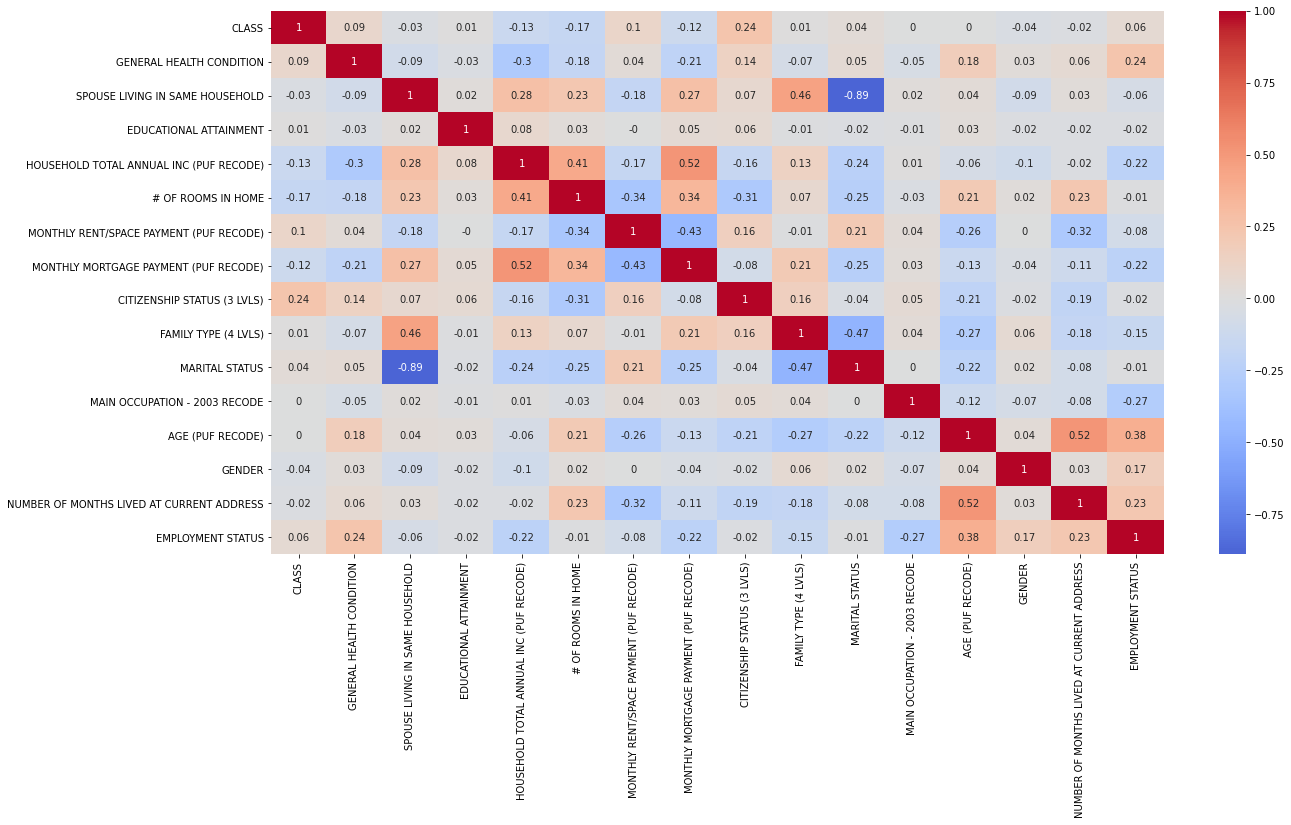

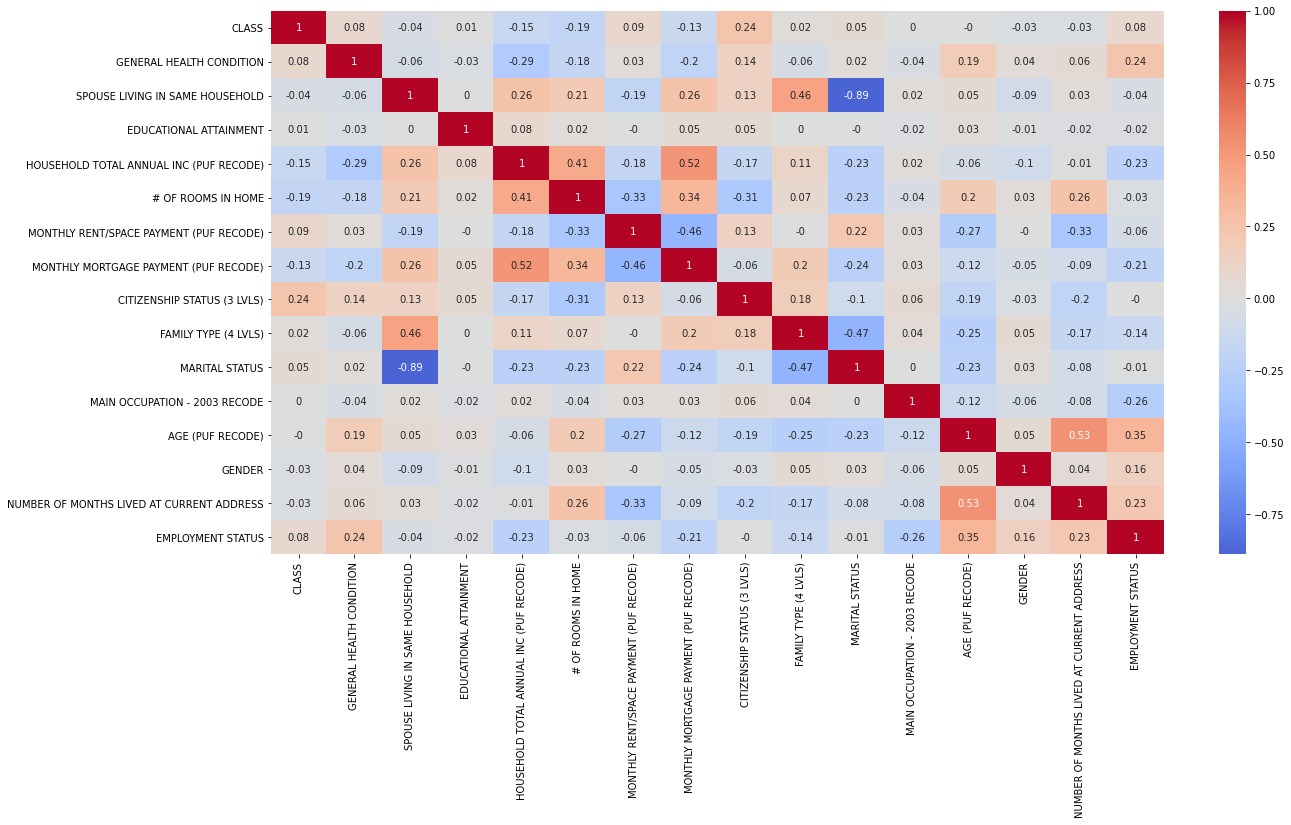

In [13]:
import seaborn as sb
temp_train=train_set.copy()

# change class attribute to number
# do it for the train set first
i=2
while(i<28031):
    if(temp_train['CLASS'][i]=='c'):
        temp_train['CLASS'][i]=1
    elif (temp_train['CLASS'][i]=='d'):
        temp_train['CLASS'][i]=2
    elif (temp_train['CLASS'][i]=='b'):
        temp_train['CLASS'][i]=3
    elif (temp_train['CLASS'][i]=='n'):
        temp_train['CLASS'][i]=4
    i=i+1

# construct the correlation matrix
temp_train=temp_train.iloc[2:,2:];
temp_train.index=range(28029)
correlation_matrix = temp_train.astype(float).corr().round(2)
plt.figure(figsize=(20,10))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')


temp_test=test_set.copy()

# change class attribute to number
# do it for the train set first
i=2
while(i<14017):
    if(temp_test['CLASS'][i]=='c'):
        temp_test['CLASS'][i]=1
    elif (temp_test['CLASS'][i]=='d'):
        temp_test['CLASS'][i]=2
    elif (temp_test['CLASS'][i]=='b'):
        temp_test['CLASS'][i]=3
    elif (temp_test['CLASS'][i]=='n'):
        temp_test['CLASS'][i]=4
    i=i+1

# construct the correlation matrix
temp_test=temp_test.iloc[2:,2:];
temp_test.index=range(14015)
correlation_matrix = temp_test.astype(float).corr().round(2)
plt.figure(figsize=(20,10))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

I will not replace numbers with text values as this will make the classifier harder to understand. Number is also more effective. 

Encoding labels is also meanful as categorical attributes may bot be that efficient for classification.

I will normalize the values to prevent distance measures from being dominated by one of the attributes. After normalization, they will all have value between 0 and 1. 

In [14]:
# Before Normalization ,we want to one-hot encoding for the categorical attributes first
train_set = pd.get_dummies(train_set.iloc[2:,:],columns=['GENERAL HEALTH CONDITION', 'SPOUSE LIVING IN SAME HOUSEHOLD','EDUCATIONAL ATTAINMENT','CITIZENSHIP STATUS (3 LVLS)','FAMILY TYPE (4 LVLS)','MARITAL STATUS','MAIN OCCUPATION - 2003 RECODE','GENDER','EMPLOYMENT STATUS'])
train_set.index=range(28029)

test_set = pd.get_dummies(test_set.iloc[2:,:],columns=['GENERAL HEALTH CONDITION', 'SPOUSE LIVING IN SAME HOUSEHOLD','EDUCATIONAL ATTAINMENT','CITIZENSHIP STATUS (3 LVLS)','FAMILY TYPE (4 LVLS)','MARITAL STATUS','MAIN OCCUPATION - 2003 RECODE','GENDER','EMPLOYMENT STATUS'])
test_set.index=range(14015)

# then convert the payment of -1 to 0 for further normalization.
i=0
while(i<28029):
    if(train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'][i]==-1):
        train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'][i]=0
    i=i+1
    
i=0
while(i<14015):
    if(test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'][i]==-1):
        test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'][i]=0
    i=i+1
    
i=0
while(i<28029):
    if(train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'][i]==-1):
        train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'][i]=0
    i=i+1
    
i=0
while(i<14015):
    if(test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'][i]==-1):
        test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'][i]=0
    i=i+1

# then we need to normalize the remaining attributes.
train_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']=((train_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']-train_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].min())/(train_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].max()-train_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].min()))
train_set['# OF ROOMS IN HOME']=((train_set['# OF ROOMS IN HOME']-train_set['# OF ROOMS IN HOME'].min())/(train_set['# OF ROOMS IN HOME'].max()-train_set['# OF ROOMS IN HOME'].min()))
train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)']=((train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)']-train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].min())/(train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].max()-train_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].min()))
train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)']=((train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)']-train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].min())/(train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].max()-train_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].min()))
train_set['AGE (PUF RECODE)']=((train_set['AGE (PUF RECODE)']-train_set['AGE (PUF RECODE)'].min())/(train_set['AGE (PUF RECODE)'].max()-train_set['AGE (PUF RECODE)'].min()))
train_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS']=((train_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS']-train_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].min())/(train_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].max()-train_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].min()))
display(train_set)

test_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']=((test_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']-test_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].min())/(test_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].max()-test_set['HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)'].min()))
test_set['# OF ROOMS IN HOME']=((test_set['# OF ROOMS IN HOME']-test_set['# OF ROOMS IN HOME'].min())/(test_set['# OF ROOMS IN HOME'].max()-test_set['# OF ROOMS IN HOME'].min()))
test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)']=((test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)']-test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].min())/(test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].max()-test_set['MONTHLY RENT/SPACE PAYMENT (PUF RECODE)'].min()))
test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)']=((test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)']-test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].min())/(test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].max()-test_set['MONTHLY MORTGAGE PAYMENT (PUF RECODE)'].min()))
test_set['AGE (PUF RECODE)']=((test_set['AGE (PUF RECODE)']-test_set['AGE (PUF RECODE)'].min())/(test_set['AGE (PUF RECODE)'].max()-test_set['AGE (PUF RECODE)'].min()))
test_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS']=((test_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS']-test_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].min())/(test_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].max()-test_set['NUMBER OF MONTHS LIVED AT CURRENT ADDRESS'].min()))
test_set.index=range(28030,42045)
display(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:

,RECID,TRAIN,CLASS,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),# OF ROOMS IN HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),AGE (PUF RECODE),NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,GENERAL HEALTH CONDITION_1,GENERAL HEALTH CONDITION_2,GENERAL HEALTH CONDITION_3,GENERAL HEALTH CONDITION_4,GENERAL HEALTH CONDITION_5,SPOUSE LIVING IN SAME HOUSEHOLD_-1,SPOUSE LIVING IN SAME HOUSEHOLD_1,SPOUSE LIVING IN SAME HOUSEHOLD_2,EDUCATIONAL ATTAINMENT_1,EDUCATIONAL ATTAINMENT_2,EDUCATIONAL ATTAINMENT_3,EDUCATIONAL ATTAINMENT_4,EDUCATIONAL ATTAINMENT_5,EDUCATIONAL ATTAINMENT_6,EDUCATIONAL ATTAINMENT_7,EDUCATIONAL ATTAINMENT_8,EDUCATIONAL ATTAINMENT_9,EDUCATIONAL ATTAINMENT_10,EDUCATIONAL ATTAINMENT_91,CITIZENSHIP STATUS (3 LVLS)_1,CITIZENSHIP STATUS (3 LVLS)_2,CITIZENSHIP STATUS (3 LVLS)_3,FAMILY TYPE (4 LVLS)_1,FAMILY TYPE (4 LVLS)_2,FAMILY TYPE (4 LVLS)_3,FAMILY TYPE (4 LVLS)_4,MARITAL STATUS_1,MARITAL STATUS_2,MARITAL STATUS_3,MAIN OCCUPATION - 2003 RECODE_-1,MAIN OCCUPATION - 2003 RECODE_1,MAIN OCCUPATION - 2003 RECODE_2,MAIN OCCUPATION - 2003 RECODE_3,MAIN OCCUPATION - 2003 RECODE_4,MAIN OCCUPATION - 2003 RECODE_5,MAIN OCCUPATION - 2003 RECODE_6,MAIN OCCUPATION - 2003 RECODE_7,MAIN OCCUPATION - 2003 RECODE_8,MAIN OCCUPATION - 2003 RECODE_9,MAIN OCCUPATION - 2003 RECODE_10,MAIN OCCUPATION - 2003 RECODE_11,MAIN OCCUPATION - 2003 RECODE_99,GENDER_1,GENDER_2,EMPLOYMENT STATUS_-2,EMPLOYMENT STATUS_1,EMPLOYMENT STATUS_2,EMPLOYMENT STATUS_3,EMPLOYMENT STATUS_4,EMPLOYMENT STATUS_5
0,1,y,c,0.166667,0.0561798,0,0.15,0.253731,0.0461237,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,y,d,0.044,0.0224719,0.085,0,0.940299,0.0578999,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,y,n,0.04,0.0224719,0.175,0,0.0597015,0.0343474,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,y,c,0.0266667,0.0561798,0.15,0,0.656716,0.140334,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,5,y,d,0.216667,0.0449438,0,0.3,0.343284,0.140334,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28024,28025,y,d,0.25,0.0337079,0,0.3,0.402985,0.0932287,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
28025,28026,y,n,0.2,0.0674157,0,0.13125,0.61194,0.375859,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
28026,28027,y,d,0.1,0.0449438,0.2,0,0.462687,0.0461237,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
28027,28028,y,c,0.116667,0.0561798,0,0.28625,0.820896,0.140334,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


,RECID,TRAIN,CLASS,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),# OF ROOMS IN HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),AGE (PUF RECODE),NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,GENERAL HEALTH CONDITION_1,GENERAL HEALTH CONDITION_2,GENERAL HEALTH CONDITION_3,GENERAL HEALTH CONDITION_4,GENERAL HEALTH CONDITION_5,SPOUSE LIVING IN SAME HOUSEHOLD_-1,SPOUSE LIVING IN SAME HOUSEHOLD_1,SPOUSE LIVING IN SAME HOUSEHOLD_2,EDUCATIONAL ATTAINMENT_1,EDUCATIONAL ATTAINMENT_2,EDUCATIONAL ATTAINMENT_3,EDUCATIONAL ATTAINMENT_4,EDUCATIONAL ATTAINMENT_5,EDUCATIONAL ATTAINMENT_6,EDUCATIONAL ATTAINMENT_7,EDUCATIONAL ATTAINMENT_8,EDUCATIONAL ATTAINMENT_9,EDUCATIONAL ATTAINMENT_10,EDUCATIONAL ATTAINMENT_91,CITIZENSHIP STATUS (3 LVLS)_1,CITIZENSHIP STATUS (3 LVLS)_2,CITIZENSHIP STATUS (3 LVLS)_3,FAMILY TYPE (4 LVLS)_1,FAMILY TYPE (4 LVLS)_2,FAMILY TYPE (4 LVLS)_3,FAMILY TYPE (4 LVLS)_4,MARITAL STATUS_1,MARITAL STATUS_2,MARITAL STATUS_3,MAIN OCCUPATION - 2003 RECODE_-1,MAIN OCCUPATION - 2003 RECODE_1,MAIN OCCUPATION - 2003 RECODE_2,MAIN OCCUPATION - 2003 RECODE_3,MAIN OCCUPATION - 2003 RECODE_4,MAIN OCCUPATION - 2003 RECODE_5,MAIN OCCUPATION - 2003 RECODE_6,MAIN OCCUPATION - 2003 RECODE_7,MAIN OCCUPATION - 2003 RECODE_8,MAIN OCCUPATION - 2003 RECODE_9,MAIN OCCUPATION - 2003 RECODE_10,MAIN OCCUPATION - 2003 RECODE_11,MAIN OCCUPATION - 2003 RECODE_99,GENDER_1,GENDER_2,EMPLOYMENT STATUS_-2,EMPLOYMENT STATUS_1,EMPLOYMENT STATUS_2,EMPLOYMENT STATUS_3,EMPLOYMENT STATUS_4,EMPLOYMENT STATUS_5
28030,28030,n,n,0.166667,0.046875,0,0.25,0.253731,0.0559242,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
28031,28031,n,n,0.15,0.0625,0,0.425,0.149254,0.0331754,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
28032,28032,n,n,0,0.015625,0.275,0,0.298507,0.00947867,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
28033,28033,n,n,0.6,0.09375,0,0.2505,0.208955,0.0331754,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
28034,28034,n,d,0.0766667,0.046875,0,0,1,0.22654,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42040,42040,n,d,0.433333,0.09375,0,0.45,0.328358,0.112796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
42041,42041,n,n,0.233333,0.078125,0,0.3,0.432836,0.181043,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
42042,42042,n,n,0.0666667,0,0.4125,0,0.0597015,0.0104265,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
42043,42043,n,d,0.09,0.0625,0.725,0,0.134328,0.0218009,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

First of all, for the set up, I will convert the CLASS attribute from character to int, which is required for the package use and further store of results. I will extract the CLASS attribute column from training set as target and other attributes as data. After the model is trained, I will test them on the test set so get the results. Comparing the results and actual class will give us information for further analysis of profit and accuracy. 

In [15]:
# convert CLASS character to int
# 1 represents cat only
# 2 represents dog only
# 3 represents both
# 4 represents neither
i=0
while(i<28029):
    if(train_set['CLASS'][i]=='c'):
        train_set['CLASS'][i]=1
    elif(train_set['CLASS'][i]=='d'):
        train_set['CLASS'][i]=2
    elif(train_set['CLASS'][i]=='b'):
        train_set['CLASS'][i]=3
    elif(train_set['CLASS'][i]=='n'):
        train_set['CLASS'][i]=4
    i=i+1
    
i=28030
while(i<42045):
    if(test_set['CLASS'][i]=='c'):
        test_set['CLASS'][i]=1
    elif(test_set['CLASS'][i]=='d'):
        test_set['CLASS'][i]=2
    elif(test_set['CLASS'][i]=='b'):
        test_set['CLASS'][i]=3
    elif(test_set['CLASS'][i]=='n'):
        test_set['CLASS'][i]=4
    i=i+1
display(train_set)
display(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import ke

,RECID,TRAIN,CLASS,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),# OF ROOMS IN HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),AGE (PUF RECODE),NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,GENERAL HEALTH CONDITION_1,GENERAL HEALTH CONDITION_2,GENERAL HEALTH CONDITION_3,GENERAL HEALTH CONDITION_4,GENERAL HEALTH CONDITION_5,SPOUSE LIVING IN SAME HOUSEHOLD_-1,SPOUSE LIVING IN SAME HOUSEHOLD_1,SPOUSE LIVING IN SAME HOUSEHOLD_2,EDUCATIONAL ATTAINMENT_1,EDUCATIONAL ATTAINMENT_2,EDUCATIONAL ATTAINMENT_3,EDUCATIONAL ATTAINMENT_4,EDUCATIONAL ATTAINMENT_5,EDUCATIONAL ATTAINMENT_6,EDUCATIONAL ATTAINMENT_7,EDUCATIONAL ATTAINMENT_8,EDUCATIONAL ATTAINMENT_9,EDUCATIONAL ATTAINMENT_10,EDUCATIONAL ATTAINMENT_91,CITIZENSHIP STATUS (3 LVLS)_1,CITIZENSHIP STATUS (3 LVLS)_2,CITIZENSHIP STATUS (3 LVLS)_3,FAMILY TYPE (4 LVLS)_1,FAMILY TYPE (4 LVLS)_2,FAMILY TYPE (4 LVLS)_3,FAMILY TYPE (4 LVLS)_4,MARITAL STATUS_1,MARITAL STATUS_2,MARITAL STATUS_3,MAIN OCCUPATION - 2003 RECODE_-1,MAIN OCCUPATION - 2003 RECODE_1,MAIN OCCUPATION - 2003 RECODE_2,MAIN OCCUPATION - 2003 RECODE_3,MAIN OCCUPATION - 2003 RECODE_4,MAIN OCCUPATION - 2003 RECODE_5,MAIN OCCUPATION - 2003 RECODE_6,MAIN OCCUPATION - 2003 RECODE_7,MAIN OCCUPATION - 2003 RECODE_8,MAIN OCCUPATION - 2003 RECODE_9,MAIN OCCUPATION - 2003 RECODE_10,MAIN OCCUPATION - 2003 RECODE_11,MAIN OCCUPATION - 2003 RECODE_99,GENDER_1,GENDER_2,EMPLOYMENT STATUS_-2,EMPLOYMENT STATUS_1,EMPLOYMENT STATUS_2,EMPLOYMENT STATUS_3,EMPLOYMENT STATUS_4,EMPLOYMENT STATUS_5
0,1,y,1,0.166667,0.0561798,0,0.15,0.253731,0.0461237,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,y,2,0.044,0.0224719,0.085,0,0.940299,0.0578999,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,y,4,0.04,0.0224719,0.175,0,0.0597015,0.0343474,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,y,1,0.0266667,0.0561798,0.15,0,0.656716,0.140334,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,5,y,2,0.216667,0.0449438,0,0.3,0.343284,0.140334,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28024,28025,y,2,0.25,0.0337079,0,0.3,0.402985,0.0932287,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
28025,28026,y,4,0.2,0.0674157,0,0.13125,0.61194,0.375859,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
28026,28027,y,2,0.1,0.0449438,0.2,0,0.462687,0.0461237,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
28027,28028,y,1,0.116667,0.0561798,0,0.28625,0.820896,0.140334,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


,RECID,TRAIN,CLASS,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),# OF ROOMS IN HOME,MONTHLY RENT/SPACE PAYMENT (PUF RECODE),MONTHLY MORTGAGE PAYMENT (PUF RECODE),AGE (PUF RECODE),NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,GENERAL HEALTH CONDITION_1,GENERAL HEALTH CONDITION_2,GENERAL HEALTH CONDITION_3,GENERAL HEALTH CONDITION_4,GENERAL HEALTH CONDITION_5,SPOUSE LIVING IN SAME HOUSEHOLD_-1,SPOUSE LIVING IN SAME HOUSEHOLD_1,SPOUSE LIVING IN SAME HOUSEHOLD_2,EDUCATIONAL ATTAINMENT_1,EDUCATIONAL ATTAINMENT_2,EDUCATIONAL ATTAINMENT_3,EDUCATIONAL ATTAINMENT_4,EDUCATIONAL ATTAINMENT_5,EDUCATIONAL ATTAINMENT_6,EDUCATIONAL ATTAINMENT_7,EDUCATIONAL ATTAINMENT_8,EDUCATIONAL ATTAINMENT_9,EDUCATIONAL ATTAINMENT_10,EDUCATIONAL ATTAINMENT_91,CITIZENSHIP STATUS (3 LVLS)_1,CITIZENSHIP STATUS (3 LVLS)_2,CITIZENSHIP STATUS (3 LVLS)_3,FAMILY TYPE (4 LVLS)_1,FAMILY TYPE (4 LVLS)_2,FAMILY TYPE (4 LVLS)_3,FAMILY TYPE (4 LVLS)_4,MARITAL STATUS_1,MARITAL STATUS_2,MARITAL STATUS_3,MAIN OCCUPATION - 2003 RECODE_-1,MAIN OCCUPATION - 2003 RECODE_1,MAIN OCCUPATION - 2003 RECODE_2,MAIN OCCUPATION - 2003 RECODE_3,MAIN OCCUPATION - 2003 RECODE_4,MAIN OCCUPATION - 2003 RECODE_5,MAIN OCCUPATION - 2003 RECODE_6,MAIN OCCUPATION - 2003 RECODE_7,MAIN OCCUPATION - 2003 RECODE_8,MAIN OCCUPATION - 2003 RECODE_9,MAIN OCCUPATION - 2003 RECODE_10,MAIN OCCUPATION - 2003 RECODE_11,MAIN OCCUPATION - 2003 RECODE_99,GENDER_1,GENDER_2,EMPLOYMENT STATUS_-2,EMPLOYMENT STATUS_1,EMPLOYMENT STATUS_2,EMPLOYMENT STATUS_3,EMPLOYMENT STATUS_4,EMPLOYMENT STATUS_5
28030,28030,n,4,0.166667,0.046875,0,0.25,0.253731,0.0559242,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
28031,28031,n,4,0.15,0.0625,0,0.425,0.149254,0.0331754,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
28032,28032,n,4,0,0.015625,0.275,0,0.298507,0.00947867,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
28033,28033,n,4,0.6,0.09375,0,0.2505,0.208955,0.0331754,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
28034,28034,n,2,0.0766667,0.046875,0,0,1,0.22654,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42040,42040,n,2,0.433333,0.09375,0,0.45,0.328358,0.112796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
42041,42041,n,4,0.233333,0.078125,0,0.3,0.432836,0.181043,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
42042,42042,n,4,0.0666667,0,0.4125,0,0.0597015,0.0104265,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
42043,42043,n,2,0.09,0.0625,0.725,0,0.134328,0.0218009,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

Explanation of parameters of KNeighborsClassifier:

Definition: sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

n_neighbours: Number of neighbors to use for kneighbors queries.

weights: Weight function used in prediction. It can be 'uniform' or 'distance' or callable. We will use 'distance' this time as we need to weigh the vote with regard to 1/d^2, where d is the distance.

algorithm: Algorithm used to compute the nearest neighbors.

leaf_size: Leaf size passed to BallTree or KDTree. As we use the auto, this does not make sense to us.

p: Power parameter for the Minkowski metric. We will use p=2 as we calculate the euclidean distance.

metric: we use the deflaut one which uses p=2.

metric_paramsdict: Additional keyword arguments for the metric function.

n_jobs: The number of parallel jobs to run for neighbors search. 

Execution options:
I will execute the KNeighborsClassifier with weights='distance' according to problem requirement. I will execute the classifier several times with different number of neignbours to see which is the most efficient one in terms of accuracy.

***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [17]:
actual_class=test_set['CLASS'].tolist()

# start from n_neignbors=5
neighbour = KNeighborsClassifier(n_neighbors=5,weights='distance',p=2)

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

neighbour.fit(train_data.astype(float),train_target.astype(float))

# the model has been fit, and then we will test it for comparation with other fits with different K
n_5_predict=neighbour.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(n_5_predict)):
    if(float(n_5_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(n_5_predict)
print('accuracy for K=',5,' is',accuracy)


# try n_neignbors=20
neighbour = KNeighborsClassifier(n_neighbors=20,weights='distance',p=2)

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

neighbour.fit(train_data.astype(float),train_target.astype(float))

# the model has been fit, and then we will test it for comparation with other fits with different K
n_20_predict=neighbour.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(n_20_predict)):
    if(float(n_20_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(n_20_predict)
print('accuracy for K=',20,' is',accuracy)


# try n_neignbors=100
neighbour = KNeighborsClassifier(n_neighbors=100,weights='distance',p=2)

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

neighbour.fit(train_data.astype(float),train_target.astype(float))

# the model has been fit, and then we will test it for comparation with other fits with different K
n_100_predict=neighbour.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(n_100_predict)):
    if(float(n_100_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(n_100_predict)
print('accuracy for K=',100,' is',accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


accuracy for K= 5  is 0.49910809846592935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


accuracy for K= 20  is 0.5486978237602569


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


accuracy for K= 100  is 0.5797359971459151


We can see that the accuracy of prediction increases with the increase of K. That is because if k is too small, sensitive to noise points–If k is too large, neighborhood may include points from other classes. However, too large is almost impossible as we have over 10000 test cases.

Now I will evaluate the performance of the classifier, using the evaluation method you defined above:

Not include cost information: I will build a confusion matrix with four attributes (dog, cat, both or neither) and then evaluate the F-measures of it, according to the calculated recall and precision.


In [18]:
# Build confusion amtrix first
from sklearn.metrics import confusion_matrix

cm5=confusion_matrix(actual_class, n_5_predict, labels=[1,2,3,4])
display(cm5)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm5) / np.sum(cm5, axis = 1)
precision = np.diag(cm5) / np.sum(cm5, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_5 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_5)


cm20=confusion_matrix(actual_class, n_20_predict, labels=[1,2,3,4])
display(cm20)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm20) / np.sum(cm20, axis = 1)
precision = np.diag(cm20) / np.sum(cm20, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_20 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_20)


cm100=confusion_matrix(actual_class, n_100_predict, labels=[1,2,3,4])
display(cm100)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm100) / np.sum(cm100, axis = 1)
precision = np.diag(cm100) / np.sum(cm100, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_100 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_100)

array([[ 281,  366,  189, 1259],
       [ 280,  504,  243, 1398],
       [ 187,  286,  153,  673],
       [ 726,  995,  418, 6057]])

recall for each CLASS:  [0.13412888 0.20783505 0.11778291 0.73901903]
precision for each CLASS:  [0.19063772 0.23430962 0.15254237 0.64525407]
overall recall is:  0.2996914683584235
overall precision is:  0.3056859478962653
F-Measures is:  0.30265902929892696


array([[ 144,  275,   80, 1596],
       [ 152,  372,  108, 1793],
       [ 100,  229,   76,  894],
       [ 351,  576,  171, 7098]])

recall for each CLASS:  [0.06873508 0.15340206 0.05850654 0.86603221]
precision for each CLASS:  [0.19277108 0.25619835 0.17471264 0.62367103]
overall recall is:  0.28666897492935983
overall precision is:  0.311838276447023
F-Measures is:  0.2987243975648644


array([[  23,  117,   15, 1940],
       [  33,  193,   13, 2186],
       [  33,  102,   18, 1146],
       [  57,  225,   23, 7891]])

recall for each CLASS:  [0.01097852 0.07958763 0.01385681 0.96278673]
precision for each CLASS:  [0.15753425 0.30298273 0.26086957 0.5994834 ]
overall recall is:  0.26680242182930536
overall precision is:  0.3302174859468807
F-Measures is:  0.2951420005714142


It seems that after F-measures balance the recall and precision (precision is "how valid the search results are", and recall is "how complete the results are"), the overall F-measures is small, which is low. We can also see that recall and precision are much larger for CLASS 4 than other classes, which means the classifier is efficient for pointing out NEITHER case rather than other cases. F-measures for three K choice are close to each other.


Include cost information: I will calculate cost according to number of calls (which is based on the confusion matrix above), and then calculate income by the number of appropriate call/classification made (Prospects who are correctly classified will buy the appropriate feeding system 15% of the time). Then I can evalaute the classification according to net profit.

In [19]:
# i to be actual, j to be predict
cat_call=cm5[0][0]
dog_call=cm5[1][1]
both_call=cm5[2][2]
no_call=cm5[0][3]+cm5[1][3]+cm5[2][3]+cm5[3][3]
wrong_call=cm5.sum()-cat_call-dog_call-both_call-no_call


cm5[:,0:3]=cm5[:,0:3]*10
cm5[:,3]=0
cost_matrix=cm5
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm20[0][0]
dog_call=cm20[1][1]
both_call=cm20[2][2]
no_call=cm20[0][3]+cm20[1][3]+cm20[2][3]+cm20[3][3]
wrong_call=cm20.sum()-cat_call-dog_call-both_call-no_call


cm20[:,0:3]=cm20[:,0:3]*10
cm20[:,3]=0
cost_matrix=cm20
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm100[0][0]
dog_call=cm100[1][1]
both_call=cm100[2][2]
no_call=cm100[0][3]+cm100[1][3]+cm100[2][3]+cm100[3][3]
wrong_call=cm100.sum()-cat_call-dog_call-both_call-no_call


cm100[:,0:3]=cm100[:,0:3]*10
cm100[:,3]=0
cost_matrix=cm100
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)

Cost matrix is:  [[2810 3660 1890    0]
 [2800 5040 2430    0]
 [1870 2860 1530    0]
 [7260 9950 4180    0]]
Net profit is:  -31905.5
Cost matrix is:  [[1440 2750  800    0]
 [1520 3720 1080    0]
 [1000 2290  760    0]
 [3510 5760 1710    0]]
Net profit is:  -17322.0
Cost matrix is:  [[ 230 1170  150    0]
 [ 330 1930  130    0]
 [ 330 1020  180    0]
 [ 570 2250  230    0]]
Net profit is:  -4944.0


After generating the cost matrix, we find that the net profits are negative, which means the three K choice all do not generate any profit. However, the one which larger K still performs much better than other, it seems that the larger the K, the larger the net profit, until we reach a threshold where K is negatively related to F-measures and net profit.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

I think the categorical data makes KNN a bad choice. Even though I have encoded the categorical attributes and encoded the monthly payment, the distance functions still fail to predict the CLASS accurately, especially for the CLASS except NEITHER. Also, the problem is not profitable initially as only 15 percent of right call will result in a successful purchase, while each call including right and wrong call will cost 10 dollars each. Even though you make a right call, the net profit is still tiny.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [22]:
from sklearn.linear_model import LogisticRegression

Explanation of parameters of LogisticRegression:

Definition: sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

penalty: Used to specify the norm used in the penalization.

dual: Dual or primal formulation. Prefer dual=False when n_samples > n_features. So we will use 'False' as we have sample size much larger than feature size.

tol: Tolerance for stopping criteria.

C: Inverse of regularization strength.

fit_intercept: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function. 

intercept_scaling: Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True.

class_weight: If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. 

random_state: Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. 

solver: Algorithm to use in the optimization problem.

max_iter: Maximum number of iterations taken for the solvers to converge.

multi_class: If the option chosen is 'ovr', then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'. We will use the 'auto' for this problem.

warm_start: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

n_jobs: Number of CPU cores used when parallelizing over classes if multi_class='ovr'.

l1_ratio: The Elastic-Net mixing parameter, only used if penalty='elasticnet'.

Execution options: I will execute the LogisticRegression with one weight. The auto will help us get the multinominal classification.

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [24]:
# I will use several different regularization parameters

# Try L1 regularization first
actual_class=test_set['CLASS'].tolist()
logistic=LogisticRegression(random_state=0,l1_ratio=1,penalty='l1',multi_class='auto',solver='liblinear')

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

logistic.fit(train_data.astype(float),train_target.astype(float))

l1_predict=logistic.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(l1_predict)):
    if(float(l1_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(l1_predict)
print('accuracy for l1 regularization is ',accuracy)


# Try L2 regularization
actual_class=test_set['CLASS'].tolist()
logistic=LogisticRegression(random_state=0,l1_ratio=0,penalty='l2',multi_class='auto')

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

logistic.fit(train_data.astype(float),train_target.astype(float))

# the model has been fit, and then we will test it for comparation with other fits with different K
l2_predict=logistic.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(l2_predict)):
    if(float(l2_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(l2_predict)
print('accuracy for l2 regularization is ',accuracy)


# Try no regularization
actual_class=test_set['CLASS'].tolist()
logistic=LogisticRegression(random_state=0,penalty='none',multi_class='auto', solver='saga')

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

logistic.fit(train_data.astype(float),train_target.astype(float))

# the model has been fit, and then we will test it for comparation with other fits with different K
no_predict=logistic.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(no_predict)):
    if(float(no_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(no_predict)
print('accuracy for with no regularization is ',accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for l1 regularization is  0.5758829825187299


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/u

accuracy for l2 regularization is  0.5780948983232251
accuracy for with no regularization is  0.5743845879414913


We can see that L1 and L2 regularization have similar performance in terms of accuracy, and regularization does help a lot. Without regularization, the accuracy is much lower sometimes.

Now I will evaluate the performance of the classifier, using the evaluation method you defined above:

Not include cost information: I will build a confusion matrix with four attributes (dog, cat, both or neither) and then evaluate the F-measures of it, according to the calculated recall and precision.


In [25]:
# Build confusion amtrix first
from sklearn.metrics import confusion_matrix

cm_l1=confusion_matrix(actual_class, l1_predict, labels=[1,2,3,4])
display(cm_l1)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_l1) / np.sum(cm_l1, axis = 1)
precision = np.diag(cm_l1) / np.sum(cm_l1, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_l1 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_l1)


cm_l2=confusion_matrix(actual_class, l2_predict, labels=[1,2,3,4])
display(cm_l2)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_l2) / np.sum(cm_l2, axis = 1)
precision = np.diag(cm_l2) / np.sum(cm_l2, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_l2 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_l2)


cm_no=confusion_matrix(actual_class, no_predict, labels=[1,2,3,4])
display(cm_no)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_no) / np.sum(cm_no, axis = 1)
precision = np.diag(cm_no) / np.sum(cm_no, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_no = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_no)

array([[   6,  319,    4, 1766],
       [   9,  494,    6, 1916],
       [   4,  295,    3,  997],
       [   7,  617,    4, 7568]])

recall for each CLASS:  [0.00286396 0.20371134 0.00230947 0.92337726]
precision for each CLASS:  [0.23076923 0.28637681 0.17647059 0.61794725]
overall recall is:  0.2830655070102081
overall precision is:  0.327890970746767
F-Measures is:  0.3038338318934151


array([[   8,  260,    4, 1823],
       [  11,  404,    6, 2004],
       [   4,  240,    3, 1052],
       [   9,  495,    5, 7687]])

recall for each CLASS:  [0.00381862 0.16659794 0.00230947 0.93789653]
precision for each CLASS:  [0.25       0.2887777  0.16666667 0.61173007]
overall recall is:  0.27765563940334037
overall precision is:  0.32929360756952164
F-Measures is:  0.30127799850532216


array([[   6,  334,   11, 1744],
       [  10,  530,   13, 1872],
       [   3,  315,   17,  964],
       [   8,  663,   28, 7497]])

recall for each CLASS:  [0.00286396 0.2185567  0.01308699 0.91471449]
precision for each CLASS:  [0.22222222 0.28773073 0.24637681 0.62076675]
overall recall is:  0.2873055369281553
overall precision is:  0.34427412699879645
F-Measures is:  0.31322054384354353


It seems that after F-measures balance the recall and precision (precision is "how valid the search results are", and recall is "how complete the results are"), the F-measures for three different regularizations are similar, which is different from the case of accuracy. The NEITHER case is predicted pretty well. 


Include cost information: I will calculate cost according to number of calls (which is based on the confusion matrix above), and then calculate income by the number of appropriate call/classification made (Prospects who are correctly classified will buy the appropriate feeding system 15% of the time). Then I can evalaute the classification according to net profit.

In [26]:
# i to be actual, j to be predict
cat_call=cm_l1[0][0]
dog_call=cm_l1[1][1]
both_call=cm_l1[2][2]
no_call=cm_l1[0][3]+cm_l1[1][3]+cm_l1[2][3]+cm_l1[3][3]
wrong_call=cm_l1.sum()-cat_call-dog_call-both_call-no_call


cm_l1[:,0:3]=cm_l1[:,0:3]*10
cm_l1[:,3]=0
cost_matrix=cm_l1
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm_l2[0][0]
dog_call=cm_l2[1][1]
both_call=cm_l2[2][2]
no_call=cm_l2[0][3]+cm_l2[1][3]+cm_l2[2][3]+cm_l2[3][3]
wrong_call=cm_l2.sum()-cat_call-dog_call-both_call-no_call


cm_l2[:,0:3]=cm_l2[:,0:3]*10
cm_l2[:,3]=0
cost_matrix=cm_l2
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm_no[0][0]
dog_call=cm_no[1][1]
both_call=cm_no[2][2]
no_call=cm_no[0][3]+cm_no[1][3]+cm_no[2][3]+cm_no[3][3]
wrong_call=cm_no.sum()-cat_call-dog_call-both_call-no_call


cm_no[:,0:3]=cm_no[:,0:3]*10
cm_no[:,3]=0
cost_matrix=cm_no
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)

Cost matrix is:  [[  60 3190   40    0]
 [  90 4940   60    0]
 [  40 2950   30    0]
 [  70 6170   40    0]]
Net profit is:  -10130.5
Cost matrix is:  [[  80 2600   40    0]
 [ 110 4040   60    0]
 [  40 2400   30    0]
 [  90 4950   50    0]]
Net profit is:  -8266.5
Cost matrix is:  [[  60 3340  110    0]
 [ 100 5300  130    0]
 [  30 3150  170    0]
 [  80 6630  280    0]]
Net profit is:  -10975.5


After generating the cost matrix, we find that the net profits are negative, which means the three regularization choice all do not generate any profit. However, L2 regularization has the best net profit performance. 

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

I think the issue is from overfitting. It means having too many variables in my model. As we have 56 attributes, the logistic regression model cannot generate a classification function with appropriate cofficient. Effect of characteristic of problem is similar to Section 4.3.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Explanation of parameters of SVM:

Definition: sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

C: Regularization parameter.

kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.

degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

coef0: Independent term in kernel function.

shrinking: Whether to use the shrinking heuristic.

probability: Whether to enable probability estimates.This must be enabled prior to calling fit.

cache_size: Specify the size of the kernel cache.

class_weight: Set the parameter C of class i to class_weight[i]*C for SVC.

max_iter: Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape: Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). 

break_ties: If true, decision_function_shape='ovr', and number of classes > 2.

random_state: Controls the pseudo random number generation for shuffling the data for probability estimates.

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [28]:
# I will use several different regularization parameters

# Try linear kernel first
actual_class=test_set['CLASS'].tolist()
svm_l=make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

svm_l.fit(train_data.astype(float),train_target.astype(float))

l_predict=svm_l.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(l_predict)):
    if(float(l_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(l_predict)
print('accuracy for linear kernel is ',accuracy)


# Try poly kernel
actual_class=test_set['CLASS'].tolist()
svm_p=make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

svm_p.fit(train_data.astype(float),train_target.astype(float))

p_predict=svm_p.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(p_predict)):
    if(float(p_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(p_predict)
print('accuracy for poly kernel is ',accuracy)


# Try rbf kernel
actual_class=test_set['CLASS'].tolist()
svm_r=make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))

train_target=train_set['CLASS'].to_frame()
train_data=train_set.iloc[:,3:]

svm_r.fit(train_data.astype(float),train_target.astype(float))

r_predict=svm_r.predict(test_set.iloc[:,3:]).tolist()

i=0
count=0
while(i<len(r_predict)):
    if(float(r_predict[i])==float(actual_class[i])):
       count=count+1
    i=i+1
accuracy=count/len(r_predict)
print('accuracy for rbf kernel is ',accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for linear kernel is  0.5848019978594363


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for poly kernel is  0.5745986443096682


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for rbf kernel is  0.5842311808776312


We can see that poly,rbf and linear kernel have similar performance in terms of accuracy. The kernel type used in the algorithm does not affect the accuracy of prediction.

Now I will evaluate the performance of the classifier, using the evaluation method you defined above:

Not include cost information: I will build a confusion matrix with four attributes (dog, cat, both or neither) and then evaluate the F-measures of it, according to the calculated recall and precision.


In [29]:
# Build confusion amtrix first
from sklearn.metrics import confusion_matrix

cm_l=confusion_matrix(actual_class, l_predict, labels=[1,2,3,4])
display(cm_l)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_l) / np.sum(cm_l, axis = 1)
precision = np.diag(cm_l) / np.sum(cm_l, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_l = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_l)


cm_p=confusion_matrix(actual_class, p_predict, labels=[1,2,3,4])
display(cm_p)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_p) / np.sum(cm_p, axis = 1)
precision = np.diag(cm_p) / np.sum(cm_p, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_p = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_p)


cm_r=confusion_matrix(actual_class, r_predict, labels=[1,2,3,4])
display(cm_r)

# Cat,Dog,Both,Neither accordingly

# Calculate precision and recall
recall = np.diag(cm_r) / np.sum(cm_r, axis = 1)
precision = np.diag(cm_r) / np.sum(cm_r, axis = 0)

print('recall for each CLASS: ',recall)
print('precision for each CLASS: ',precision)

print('overall recall is: ',np.mean(recall))
print('overall precision is: ',np.mean(precision))

# calculate F-measures
f_measure_r = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall))
print('F-Measures is: ',f_measure_r)

array([[   0,    0,    0, 2095],
       [   0,    0,    0, 2425],
       [   0,    0,    0, 1299],
       [   0,    0,    0, 8196]])

recall for each CLASS:  [0. 0. 0. 1.]
precision for each CLASS:  [     nan      nan      nan 0.584802]
overall recall is:  0.25
overall precision is:  nan
F-Measures is:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


array([[  26,   88,    9, 1972],
       [  26,  131,   11, 2257],
       [  17,   78,   14, 1190],
       [  67,  225,   22, 7882]])

recall for each CLASS:  [0.0124105  0.05402062 0.01077752 0.96168863]
precision for each CLASS:  [0.19117647 0.25095785 0.25       0.59258702]
overall recall is:  0.2597243173798665
overall precision is:  0.3211803371316077
F-Measures is:  0.2872014991427289


array([[   0,   17,    0, 2078],
       [   1,   28,    1, 2395],
       [   0,   24,    3, 1272],
       [   1,   36,    2, 8157]])

recall for each CLASS:  [0.         0.01154639 0.00230947 0.99524158]
precision for each CLASS:  [0.         0.26666667 0.5        0.58675011]
overall recall is:  0.2522743604584748
overall precision is:  0.33835419364120267
F-Measures is:  0.28904152099247093


We can see that poly and rbf have similar f-measures, however, linear kernel does a bad job as it can only predict one linear case while ignoring others.


Include cost information: I will calculate cost according to number of calls (which is based on the confusion matrix above), and then calculate income by the number of appropriate call/classification made (Prospects who are correctly classified will buy the appropriate feeding system 15% of the time). Then I can evalaute the classification according to net profit.

In [30]:
# i to be actual, j to be predict
cat_call=cm_l[0][0]
dog_call=cm_l[1][1]
both_call=cm_l[2][2]
no_call=cm_l[0][3]+cm_l[1][3]+cm_l[2][3]+cm_l[3][3]
wrong_call=cm_l.sum()-cat_call-dog_call-both_call-no_call


cm_l[:,0:3]=cm_l[:,0:3]*10
cm_l[:,3]=0
cost_matrix=cm_l
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm_p[0][0]
dog_call=cm_p[1][1]
both_call=cm_p[2][2]
no_call=cm_p[0][3]+cm_p[1][3]+cm_p[2][3]+cm_p[3][3]
wrong_call=cm_p.sum()-cat_call-dog_call-both_call-no_call


cm_p[:,0:3]=cm_p[:,0:3]*10
cm_p[:,3]=0
cost_matrix=cm_p
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)


cat_call=cm_r[0][0]
dog_call=cm_r[1][1]
both_call=cm_r[2][2]
no_call=cm_r[0][3]+cm_r[1][3]+cm_r[2][3]+cm_r[3][3]
wrong_call=cm_r.sum()-cat_call-dog_call-both_call-no_call


cm_r[:,0:3]=cm_r[:,0:3]*10
cm_r[:,3]=0
cost_matrix=cm_no
print('Cost matrix is: ',cost_matrix)

# calculate cost, considering the 15% successful purchase rate
cost=(cat_call+dog_call+both_call+wrong_call)*10
income=0.15*(80*cat_call+100*dog_call+150*both_call)
net_profit=income-cost
print('Net profit is: ',net_profit)

Cost matrix is:  [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Net profit is:  0.0
Cost matrix is:  [[ 260  880   90    0]
 [ 260 1310  110    0]
 [ 170  780  140    0]
 [ 670 2250  220    0]]
Net profit is:  -4548.0
Cost matrix is:  [[  60 3340  110    0]
 [ 100 5300  130    0]
 [  30 3150  170    0]
 [  80 6630  280    0]]
Net profit is:  -642.5


Linear kernel cannot get an accurate net profit as it does not call. rbf kernel has a much better performance than poly kerbel.

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

The limit of kernels suitable for the problem makes the classifier a mild one. Rbf kernel presents a achievable goal of net profit, however, the complexation of data still makes it unable to achieve net profit.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?Configure the classifier
***

The three classifiers have similar f-measures and accuracy, which means that regardless of cost, they have similar performance. However, when it comes to the cost, the performance are different. Logistic regression falls much behind the performance of KNN and SVM. However, the SVM also needs the most running time, while logistic regression and KNN are much faster. Furthermore, the SVM has little room for improvement as the only parameters matter here is the kernel, while logistic regression and KNN have a lot more to modify and enhance.

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

I will choose the SVM classifier as best. It has the best performance with regard to cost when using the rbf kernel. Though the running time of it is more, the performance is greatly improved, with net profit more than 10 times than other classifiers.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I find that there may not be a so-called profitable classifier. I think the problem comes from the relatively low return on calls. The cost of each call is 10, and even with the most profitable system, the return is only 150*0.15=22.5, while the lowest return is only 80*0.15=12, with only 2 dollars of profit.

***
### END-OF-SUBMISSION
***